# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [5]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   cp           303 non-null    float64
 3   trestbps     303 non-null    float64
 4   chol         303 non-null    float64
 5   fbs          303 non-null    float64
 6   restecg      303 non-null    float64
 7   thalach      303 non-null    float64
 8   exang        303 non-null    float64
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    float64
 11  ca           303 non-null    object 
 12  thal         303 non-null    object 
 13  num          303 non-null    int64  
 14  flag_doente  303 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB


1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada. 
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

In [9]:
def bivariada(df, resposta, explicativa):
    """
    Calcula a análise bivariada entre uma variável explicativa e a variável resposta.

    Parâmetros:
    df (pd.DataFrame) - DataFrame com os dados
    resposta (str) - Nome da variável resposta binária
    explicativa (str) - Nome da variável explicativa categórica

    Retorno:
    DataFrame com as estatísticas calculadas
    """
    bivar = df.groupby(explicativa).agg(
        saudaveis=(resposta, lambda x: (x == 0).sum()),
        doentes=(resposta, lambda x: (x == 1).sum()),
        total=(resposta, 'count')
    ).reset_index()

    # Cálculo das estatísticas adicionais
    bivar['odds'] = bivar['doentes'] / bivar['saudaveis']
    total_odds = bivar['odds'].sum()
    bivar['odds_ratio'] = bivar['odds'] / total_odds
    bivar['log_odds'] = np.log(bivar['odds'])
    bivar['woe'] = np.log(bivar['odds_ratio'])

    return bivar

# Exemplo de uso com 3 variáveis qualitativas
qualitativas = ['sex', 'cp', 'restecg']
for var in qualitativas:
    print(f"\n### Análise Bivariada para {var} ###")
    print(bivariada(df, 'flag_doente', var))



### Análise Bivariada para sex ###
   sex  saudaveis  doentes  total      odds  odds_ratio  log_odds       woe
0  0.0         72       25     97  0.347222    0.218881  -1.05779 -1.519228
1  1.0         92      114    206  1.239130    0.781119   0.21441 -0.247028

### Análise Bivariada para cp ###
    cp  saudaveis  doentes  total      odds  odds_ratio  log_odds       woe
0  1.0         16        7     23  0.437500    0.121056 -0.826679 -2.111501
1  2.0         41        9     50  0.219512    0.060739 -1.516347 -2.801170
2  3.0         68       18     86  0.264706    0.073244 -1.329136 -2.613958
3  4.0         39      105    144  2.692308    0.744961  0.990399 -0.294424

### Análise Bivariada para restecg ###
   restecg  saudaveis  doentes  total      odds  odds_ratio  log_odds  \
0      0.0         95       56    151  0.589474    0.123685 -0.528525   
1      1.0          1        3      4  3.000000    0.629466  1.098612   
2      2.0         68       80    148  1.176471    0.246849  0

2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [10]:
def categorizar_continua(df, resposta, explicativa, num_categorias=5):
    """
    Categoriza uma variável contínua e executa a análise bivariada.

    Parâmetros:
    df (pd.DataFrame) - DataFrame com os dados
    resposta (str) - Nome da variável resposta binária
    explicativa (str) - Nome da variável contínua a ser categorizada
    num_categorias (int) - Número de categorias para dividir a variável contínua (default: 5)

    Retorno:
    DataFrame com as estatísticas bivariadas para a variável categorizada
    """
    df['grupo_' + explicativa] = pd.qcut(df[explicativa], num_categorias, labels=False)

    return bivariada(df, resposta, 'grupo_' + explicativa)

# Exemplo de uso com a variável 'age'
print("\n### Análise Bivariada para Age Categorizado ###")
print(categorizar_continua(df, 'flag_doente', 'age'))




### Análise Bivariada para Age Categorizado ###
   grupo_age  saudaveis  doentes  total      odds  odds_ratio  log_odds  \
0          0         47       16     63  0.340426    0.061399 -1.077559   
1          1         42       22     64  0.523810    0.094473 -0.646627   
2          2         32       39     71  1.218750    0.219811  0.197826   
3          3         13       32     45  2.461538    0.443959  0.900787   
4          4         30       30     60  1.000000    0.180358  0.000000   

        woe  
0 -2.790370  
1 -2.359438  
2 -1.514985  
3 -0.812024  
4 -1.712811  


3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [12]:
import statsmodels.api as sm

# Definir variáveis independentes e resposta
variaveis = ['sex', 'cp', 'trestbps', 'age']
X = df[variaveis]
X = sm.add_constant(X)  # Adicionar constante para o modelo
y = df['flag_doente']

# Ajustar o modelo de regressão logística
modelo = sm.Logit(y, X).fit()

# Exibir os parâmetros do modelo
print(modelo.summary())



Optimization terminated successfully.
         Current function value: 0.510076
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      298
Method:                           MLE   Df Model:                            4
Date:                Thu, 30 Jan 2025   Pseudo R-squ.:                  0.2605
Time:                        11:53:06   Log-Likelihood:                -154.55
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.264e-22
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.1167      1.608     -6.915      0.000     -14.267      -7.966
sex            1.8021      0.

4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo


### Avaliação de Calibração ###
   grupo_prob  prob_media  taxa_evento
0           0    0.076255     0.098361
1           1    0.249060     0.183333
2           2    0.457982     0.491803
3           3    0.673059     0.683333
4           4    0.837449     0.836066


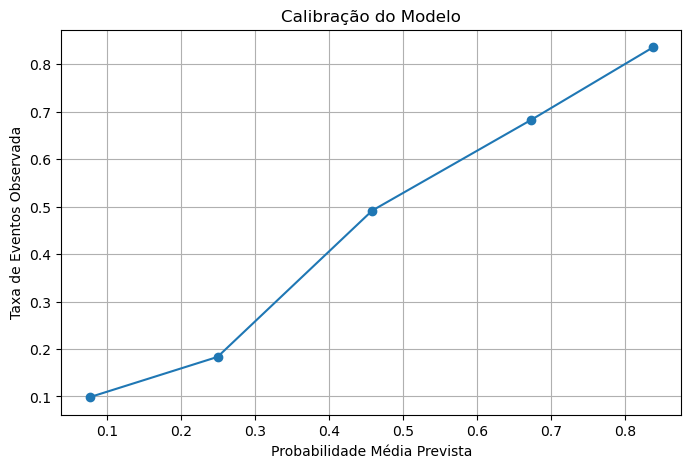

In [13]:
# Calcular probabilidades preditas
df['prob_predita'] = modelo.predict(X)

# Categorizar as probabilidades preditas em 5 grupos
df['grupo_prob'] = pd.qcut(df['prob_predita'], 5, labels=False)

# Calcular a média das probabilidades preditas por grupo
calibracao = df.groupby('grupo_prob').agg(
    prob_media=('prob_predita', 'mean'),
    taxa_evento=('flag_doente', 'mean')
).reset_index()

# Exibir tabela de calibração
print("\n### Avaliação de Calibração ###")
print(calibracao)

# Visualização gráfica da calibração
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(calibracao['prob_media'], calibracao['taxa_evento'], marker='o')
plt.xlabel("Probabilidade Média Prevista")
plt.ylabel("Taxa de Eventos Observada")
plt.title("Calibração do Modelo")
plt.grid()
plt.show()


5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

In [14]:
from sklearn.metrics import roc_auc_score, accuracy_score

# Calcular acurácia
limiar = 0.5
df['classe_predita'] = (df['prob_predita'] >= limiar).astype(int)
acuracia = accuracy_score(df['flag_doente'], df['classe_predita'])

# Calcular GINI
roc_auc = roc_auc_score(df['flag_doente'], df['prob_predita'])
gini = 2 * roc_auc - 1

# Calcular KS (Kolmogorov-Smirnov)
from scipy.stats import ks_2samp
ks = ks_2samp(df.loc[df['flag_doente'] == 1, 'prob_predita'], 
              df.loc[df['flag_doente'] == 0, 'prob_predita']).statistic

# Exibir métricas
print(f"\n### Avaliação do Modelo ###")
print(f"Acurácia: {acuracia:.4f}")
print(f"GINI: {gini:.4f}")
print(f"KS: {ks:.4f}")



### Avaliação do Modelo ###
Acurácia: 0.7789
GINI: 0.6622
KS: 0.5840


6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

In [15]:
# Testar outro modelo com mais variáveis
variaveis_novas = ['sex', 'cp', 'trestbps', 'age', 'chol', 'thalach']
X_novo = df[variaveis_novas]
X_novo = sm.add_constant(X_novo)

# Ajustar novo modelo
modelo_novo = sm.Logit(y, X_novo).fit()

# Exibir sumário do novo modelo
print(modelo_novo.summary())

# Recalcular métricas para comparar melhorias
df['prob_predita_nova'] = modelo_novo.predict(X_novo)
acuracia_nova = accuracy_score(df['flag_doente'], (df['prob_predita_nova'] >= limiar).astype(int))
roc_auc_novo = roc_auc_score(df['flag_doente'], df['prob_predita_nova'])
gini_novo = 2 * roc_auc_novo - 1
ks_novo = ks_2samp(df.loc[df['flag_doente'] == 1, 'prob_predita_nova'], 
                   df.loc[df['flag_doente'] == 0, 'prob_predita_nova']).statistic

# Exibir métricas do novo modelo
print(f"\n### Avaliação do Novo Modelo ###")
print(f"Acurácia: {acuracia_nova:.4f}")
print(f"GINI: {gini_novo:.4f}")
print(f"KS: {ks_novo:.4f}")


Optimization terminated successfully.
         Current function value: 0.463802
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            6
Date:                Thu, 30 Jan 2025   Pseudo R-squ.:                  0.3276
Time:                        11:53:29   Log-Likelihood:                -140.53
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 4.479e-27
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.2971      2.184     -2.425      0.015      -9.577      -1.017
sex            2.0642      0.